In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import nltk
import pandas as pd
import TraverseDir.TraverseDir as td
import pandas_toolkit.mytoolkit as tk
from scipy.signal import find_peaks
import scipy.signal
import pickle

In [3]:
# load
with open('/Users/wangmu/Documents/GitHub/sec_analyse/data_list/laballdata_datalist_ss_20_50','rb') as fi:
    ss = pickle.load(fi)

0.006666666666666681


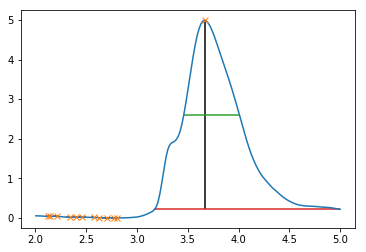

In [4]:

#show peak position as 'x'
tdata = ss[200]
x = tdata[1]
peaks,param = find_peaks(x.peak)
# get prominences
prominences = scipy.signal.peak_prominences(x.peak,peaks)[0] # prominences has 3 arraies,use first 
# get half width,full width
results_half = scipy.signal.peak_widths(x.peak, peaks, rel_height=0.5)
results_full = scipy.signal.peak_widths(x.peak, peaks, rel_height=1)
# calculation about width.
# x axis is value .time. But results_half returns indexs of .time,with which we calculate width.
# width_coefficient*results_half[0] returns what we see in the plot.
index_x_max=x.time.index[x.time==x.time.max()][0]
index_x_min=x.time.index[x.time==x.time.min()][0]
index_length = index_x_max-index_x_min
width_coefficient=(x.time.max()-x.time.min())/index_length
print(width_coefficient)

contour_heights = x.peak[peaks]-prominences
plt.plot(x.time,tdata[1].peak)
plt.plot(x.time[peaks],x.peak[peaks],"x")
plt.vlines(x=x.time[peaks], ymin=contour_heights, ymax=x.peak[peaks])
plt.hlines(y=results_half[1],
           xmin=width_coefficient*results_half[2],
           xmax=width_coefficient*results_half[3],
           color="C2")
plt.hlines(y=results_full[1],
           xmin=width_coefficient*results_full[2],
           xmax=width_coefficient*results_full[3], 
           color="C3")
plt.show()

# 成功，可以替换成 max peak

In [2]:
from visualization.viewer import viewer2d

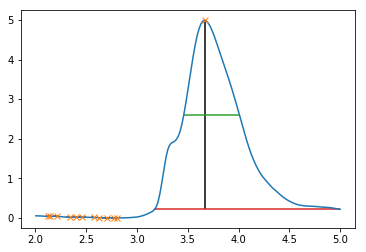

In [6]:
viewer2d(x,show=True)